## Overview
MNIST (“Modified National Institute of Standards and Technology”) is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
In this project, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

## Data Description
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called “label”, is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the “pixel” prefix, the pixels make up the image like this:

000 001 002 003 … 026 027<br>
028 029 030 031 … 054 055<br>
056 057 058 059 … 082 083<br>
| | | | … | |<br>
728 729 730 731 … 754 755<br>
756 757 758 759 … 782 783<br>

The test data set, (test.csv), is the same as the training set, except that it does not contain the “label” column.

Your submission file should be in the following format: For each of the 28000 images in the test set, output a single line containing the ImageId and the digit you predict. For example, if you predict that the first image is of a 3, the second image is of a 7, and the third image is of a 8, then your submission file would look like:

ImageId,Label
1,3
2,7
3,8
(27997 more lines)

The evaluation metric for this contest is the categorization accuracy, or the proportion of test images that are correctly classified. For example, a categorization accuracy of 0.97 indicates that you have correctly classified all but 3% of the images.

You can find the dataset here.

## Files
* test.csv
* train.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

Data input train and test data

In [2]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

## Data Exploration

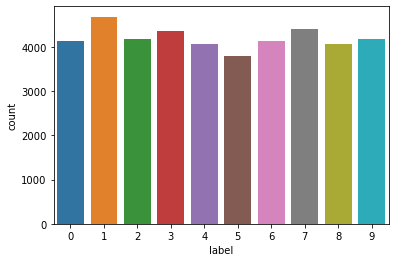

In [3]:
sns.countplot(train_data['label'])

## Show Train Image

In [4]:
def show_image(train_image, label, index):
    image_shaped = train_image.values.reshape(28,28)
    plt.subplot(3, 6, index+1)
    plt.imshow(image_shaped, cmap=plt.cm.gray)
    plt.title(label)

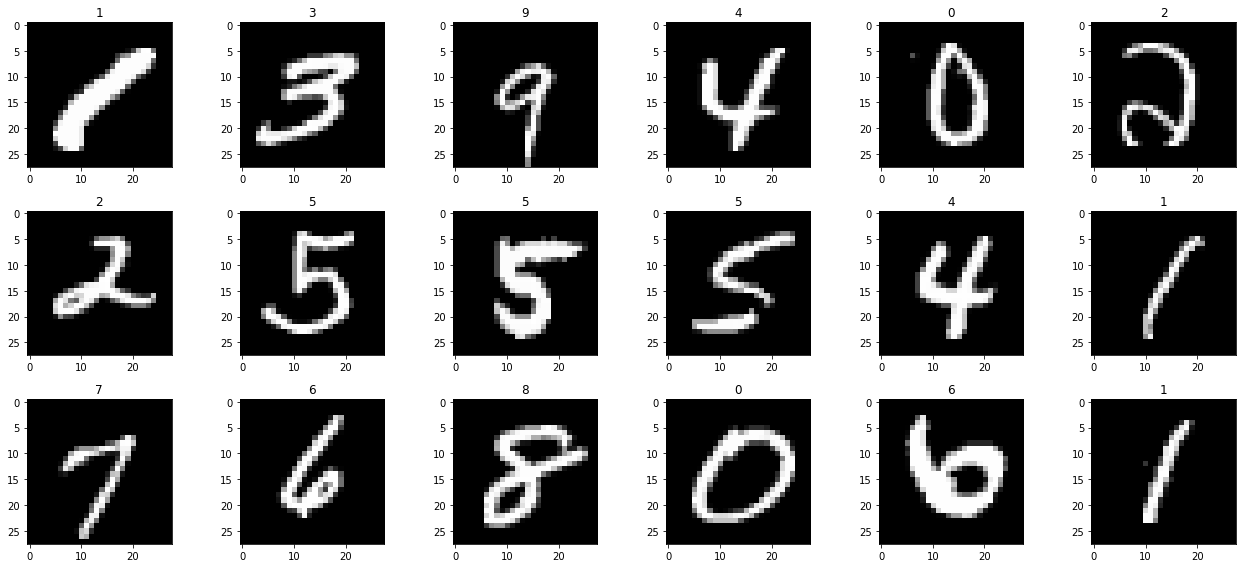

In [5]:
plt.figure(figsize=(18, 8))
sample_image = train_data.sample(18).reset_index(drop=True)
for index, row in sample_image.iterrows():
    label = row['label']
    image_pixels = row.drop('label')
    show_image(image_pixels, label, index)
plt.tight_layout()

## Pre-process Data

In [6]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D


We split data for test and train

In [7]:
x = train_data.drop(columns=['label']).values.reshape(train_data.shape[0],28,28,1)
y = to_categorical(train_data['label'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1, # Randomly zoom image
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1 # randomly shift images vertically (fraction of total height)
)
train_datagen.fit(x_train)

In [9]:
train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size=32
)

In [10]:
validation_datagen = ImageDataGenerator(rescale=1./255)
train_datagen.fit(x_test)
validation_generator = validation_datagen.flow(
    x_test,
    y_test
)

## Define Model

In [11]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

## Compile Model

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit Model

In [13]:
model.fit_generator(
    train_generator, 
    steps_per_epoch=len(x_train) // 32, 
    epochs=30
)

Epoch 1/30
1181/1181 [==============================] - 17s 14ms/step - loss: 0.3851 - accuracy: 0.8788
Epoch 2/30
1181/1181 [==============================] - 17s 14ms/step - loss: 0.1685 - accuracy: 0.9494
Epoch 3/30
1181/1181 [==============================] - 18s 15ms/step - loss: 0.1332 - accuracy: 0.9613
Epoch 4/30
1181/1181 [==============================] - 17s 14ms/step - loss: 0.1120 - accuracy: 0.9670
Epoch 5/30
1181/1181 [==============================] - 17s 14ms/step - loss: 0.1048 - accuracy: 0.9683
Epoch 6/30
1181/1181 [==============================] - 18s 15ms/step - loss: 0.0990 - accuracy: 0.9716
Epoch 7/30
1181/1181 [==============================] - 17s 14ms/step - loss: 0.0940 - accuracy: 0.9718
Epoch 8/30
1181/1181 [==============================] - 17s 14ms/step - loss: 0.0901 - accuracy: 0.9739
Epoch 9/30
1181/1181 [==============================] - 18s 15ms/step - loss: 0.0912 - accuracy: 0.9741
Epoch 10/30
1181/1181 [==============================] - 18s 15m

## Evaluate Model

In [14]:
x_test_recaled = (x_test.astype("float32") / 255)
scores = model.evaluate(x_test_recaled, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))

accuracy: 98.48%
loss: 5.26%


## Prediction

In [15]:
test_digit_data = test_data.values.reshape(test_data.shape[0],28,28,1).astype("float32") / 255
predictions = model.predict(test_digit_data)
results = np.argmax(predictions, axis = 1)

### Set how is our prediction

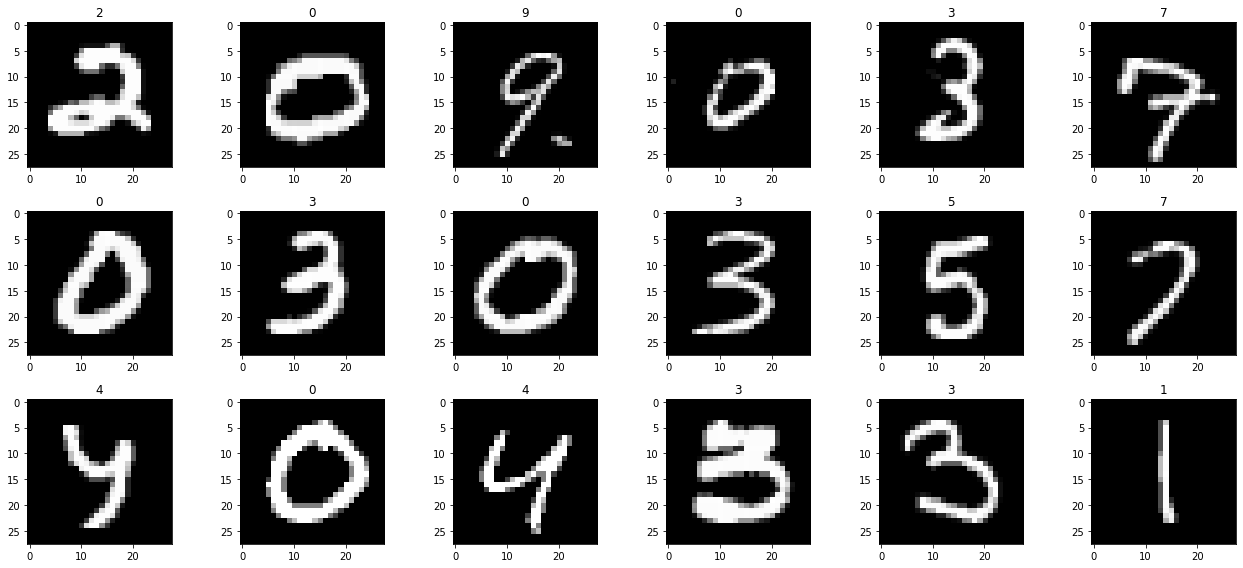

In [16]:
plt.figure(figsize=(18, 8))
sample_test = test_data.head(18)
for index, image_pixels in sample_test.iterrows():
    label = results[index]
    show_image(image_pixels, label, index)
plt.tight_layout()

### Create submission file

In [17]:
submissions = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
submissions['Label'] = results
submissions.to_csv('submission.csv', index = False)